In [226]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks

In [227]:
# For reading data
parkinsons_dataset = pd.read_csv("../dataset/parkinsons.csv") # ..->current directory

In [228]:
# Check the data
parkinsons_dataset.head() # first 5 rows

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [229]:
# Size of the dataset
parkinsons_dataset.shape

(195, 24)

In [230]:
# Statistical summary
parkinsons_dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Figure size 1200x1000 with 0 Axes>

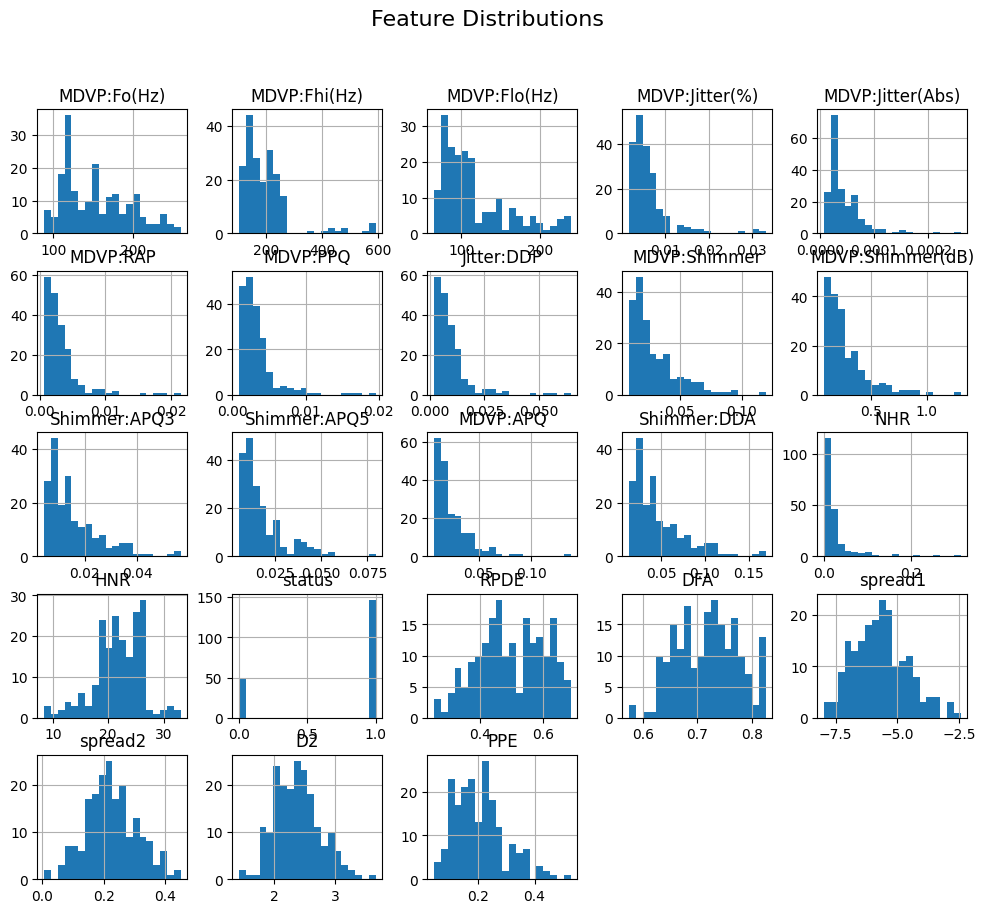

In [231]:
plt.figure(figsize=(12, 10))
parkinsons_dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [232]:
parkinsons_dataset.reset_index(drop=True, inplace=True)

In [233]:
parkinsons_dataset = parkinsons_dataset.drop(columns=['name'],axis=1)

In [234]:
# Compute the correlation matrix
correlation_matrix = parkinsons_dataset.corr()

# Check for NaN values in the correlation matrix
print(correlation_matrix.isna().sum())

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [235]:
print(parkinsons_dataset.nunique())

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64


In [236]:
print(parkinsons_dataset.corr())

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   

In [237]:
print(parkinsons_dataset.dtypes)

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [238]:
# Get correlation with target variable
target_column = "status"  # Ensure this is the correct target column
correlations = parkinsons_dataset.corr()[target_column].sort_values(ascending=False)
print(correlations)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64


In [239]:
# Unique count for parkinsons and non-diabetic patients
parkinsons_dataset['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [240]:
parkinsons_dataset.groupby('status').mean() # Groups the data according to column and displays ean of them

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [241]:
X = parkinsons_dataset.drop(columns=['status'],axis=1)
y = parkinsons_dataset['status']

In [242]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [244]:
X_train.shape

(156, 22)

In [245]:
X_test.shape

(39, 22)

In [246]:
y_train.shape

(156,)

In [247]:
y_test.shape

(39,)

In [248]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
135,110.453,127.611,105.554,0.00494,0.00004,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
122,138.190,203.522,83.340,0.00704,0.00005,0.00406,0.00398,0.01218,0.04479,0.441,...,0.03220,0.07761,0.01968,18.305,0.538016,0.741480,-5.418787,0.160267,2.090438,0.229892
167,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
85,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.02877,0.06321,0.02782,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423


In [249]:
model = svm.SVC(kernel='linear', random_state=42)

In [250]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [251]:
y_pred = model.predict(X_test)

In [252]:
print(accuracy_score(y_test, y_pred))

0.8717948717948718


In [253]:
print(f"Confusion Matrix - {model}")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix - SVC(kernel='linear', random_state=42)
[[ 3  4]
 [ 1 31]]


In [254]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8857142857142857
0.96875


In [255]:
model_2 = DecisionTreeClassifier(random_state=42)

In [256]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [257]:
y_pred_2 = model_2.predict(X_test)

In [258]:
print(accuracy_score(y_test, y_pred_2))

0.9230769230769231


In [259]:
print(f"Confusion Matrix - {model_2}")
print(confusion_matrix(y_test, y_pred_2))

Confusion Matrix - DecisionTreeClassifier(random_state=42)
[[ 5  2]
 [ 1 31]]


In [260]:
print(precision_score(y_test, y_pred_2))
print(recall_score(y_test, y_pred_2))

0.9393939393939394
0.96875


In [261]:
model_3 = LogisticRegression(C=1.0, solver='liblinear')

In [262]:
model_3.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [263]:
y_pred_3 = model_3.predict(X_test)

In [264]:
# Accuracy
print(accuracy_score(y_test, y_pred_3))

0.8717948717948718


In [265]:
print(f"Confusion Matrix - {model_3}")
print(confusion_matrix(y_test, y_pred_3))

Confusion Matrix - LogisticRegression(solver='liblinear')
[[ 3  4]
 [ 1 31]]


In [266]:
print(precision_score(y_test, y_pred_3))
print(recall_score(y_test, y_pred_3))

0.8857142857142857
0.96875


In [267]:
model_4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [268]:
model_4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [269]:
y_pred_4 = model_4.predict(X_test)

In [270]:
# Accuracy
print(accuracy_score(y_test, y_pred_4))

0.9487179487179487


In [271]:
print(f"Confusion Matrix - {model_4}")
print(confusion_matrix(y_test, y_pred_4))

Confusion Matrix - RandomForestClassifier(random_state=42)
[[ 5  2]
 [ 0 32]]


In [272]:
print(precision_score(y_test, y_pred_4))
print(recall_score(y_test, y_pred_4))

0.9411764705882353
1.0


In [273]:
tomek = TomekLinks()
X_train_res, y_train_res = tomek.fit_resample(X_train, y_train)

In [274]:
model = svm.SVC(kernel='linear', random_state=42)

In [275]:
model.fit(X_train_res, y_train_res)

SVC(kernel='linear', random_state=42)

In [276]:
y_pred = model.predict(X_test)

In [277]:
print(accuracy_score(y_test, y_pred))

0.8974358974358975


In [278]:
print(f"Confusion Matrix - {model}")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix - SVC(kernel='linear', random_state=42)
[[ 3  4]
 [ 0 32]]


In [279]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8888888888888888
1.0


In [280]:
model_2 = DecisionTreeClassifier(random_state=42)

In [281]:
model_2.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [282]:
y_pred_2 = model_2.predict(X_test)

In [283]:
print(accuracy_score(y_test, y_pred_2))

0.8717948717948718


In [284]:
print(f"Confusion Matrix - {model_2}")
print(confusion_matrix(y_test, y_pred_2))

Confusion Matrix - DecisionTreeClassifier(random_state=42)
[[ 5  2]
 [ 3 29]]


In [285]:
print(precision_score(y_test, y_pred_2))
print(recall_score(y_test, y_pred_2))

0.9354838709677419
0.90625


In [286]:
model_3 = LogisticRegression(C=1.0, solver='liblinear')

In [287]:
model_3.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

In [288]:
y_pred_3 = model_3.predict(X_test)

In [289]:
# Accuracy
print(accuracy_score(y_test, y_pred_3))

0.8717948717948718


In [290]:
print(f"Confusion Matrix - {model_3}")
print(confusion_matrix(y_test, y_pred_3))

Confusion Matrix - LogisticRegression(solver='liblinear')
[[ 3  4]
 [ 1 31]]


In [291]:
print(precision_score(y_test, y_pred_3))
print(recall_score(y_test, y_pred_3))

0.8857142857142857
0.96875


In [292]:
model_4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [293]:
model_4.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [294]:
y_pred_4 = model_4.predict(X_test)

In [295]:
# Accuracy
print(accuracy_score(y_test, y_pred_4))

0.9230769230769231


In [296]:
print(f"Confusion Matrix - {model_4}")
print(confusion_matrix(y_test, y_pred_4))

Confusion Matrix - RandomForestClassifier(random_state=42)
[[ 5  2]
 [ 1 31]]


In [297]:
print(precision_score(y_test, y_pred_4))
print(recall_score(y_test, y_pred_4))

0.9393939393939394
0.96875


In [298]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(model_4, open(filename, 'wb'))